<a href="https://colab.research.google.com/github/sgsoul/mwtda/blob/main/MWTDA_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 0 (1 балл)

Данные, которые нужно использовать для выполнения задания, возьмите [здесь](https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data).

Данные расположены в двух таблицах: **penguins_iter** и **penguins_size**. Для этой лабораторной работы вам понадобится только таблица **penguins_size**.

**penguins_size** содержит следующую информацию:
* `species`: вид, к которому относится пингвин
* `culmen_length_mm`: длина клюва
* `culmen_depth_mm`: глубина клюва
* `flipper_length_mm`: длина ласт
* `body_mass_g`: масса тела
* `island`: название острова, на котором пингвин обитает
* `sex`: пол пингвина



1. Загрузите файл с данными к себе на Гугл диск и подключите его в Google Colab через `mount.drive`.
2. Выведите общую статистику по всем числовым и нечисловым столбцам с помощью функции `describe()`.
3. Узнайте размеры датасета с помощью функции `shape`.
4. Выведите 4 первые строки датасета.

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')
data = pd.read_csv("/content/drive/MyDrive/penguins_size.csv")
print("\nDataset size:", data.shape)
print("\nDataHead:")
data.head(4)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).

DataDescribe:

Dataset size: (344, 7)

DataHead:


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("\nDataDescribe:")
data.describe()


DataDescribe:


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# Задание 1 (1 балл)

1. Узнайте, сколько видов пингвинов представлено в таблице.
2. Посчитайте долю пингвинов каждого вида.
3. Выведите количество пингвинов, обитающих на каждом из островов.

In [ ]:
import numpy as np
species = np.unique(data[['species']].values)
print("Количество видов: =", species.size)
print("\nДоля пингвинов каждого вида:")
print(data.species.value_counts(normalize=True))
print("\n")
T = data.species[data.island == "Torgersen"].count()
B = data.species[data.island == "Biscoe"].count()
D = data.species[data.island == "Dream"].count()
df = pd.DataFrame([[T, B, D]],
                  columns=['Torgersen', 'Biscoe', 'Dream'], index =['число особей на острове'])
df

Количество видов: = 3

Доля пингвинов каждого вида:
Adelie       0.441860
Gentoo       0.360465
Chinstrap    0.197674
Name: species, dtype: float64




,Torgersen,Biscoe,Dream
число особей на острове,52,168,124


# Задание 2 (1 балл)

1. Найдите id пингвина с самым длинным клювом и с самым коротким. Выведите всю информацию о каждом из этих пингвинов в виде одной таблицы.
2. Посчитайте, насколько самый длинный клюв длиннее самого короткого.

In [ ]:
print("id пингвина с самым длинным клювом =")
data[data.culmen_length_mm == data.culmen_length_mm.max()]

id пингвина с самым длинным клювом =


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,MALE


In [ ]:
print("id пингвина с самым коротким клювом =")
data[data.culmen_length_mm == data.culmen_length_mm.min()]

id пингвина с самым коротким клювом =


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
142,Adelie,Dream,32.1,15.5,188.0,3050.0,FEMALE


In [ ]:
print("Разница в длине клювов: =", data.culmen_length_mm.max() - data.culmen_length_mm.min(), "мм")

Разница в длине клювов: = 27.5 мм


# Задание 3 (1 балл)

1. Постройте корреляционную матрицу для значений столбцов `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g`. 
2. Результат покажите на тепловой карте (heatmap).

                   culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
culmen_length_mm           1.000000        -0.235053           0.656181   
culmen_depth_mm           -0.235053         1.000000          -0.583851   
flipper_length_mm          0.656181        -0.583851           1.000000   
body_mass_g                0.595110        -0.471916           0.871202   

                   body_mass_g  
culmen_length_mm      0.595110  
culmen_depth_mm      -0.471916  
flipper_length_mm     0.871202  
body_mass_g           1.000000  


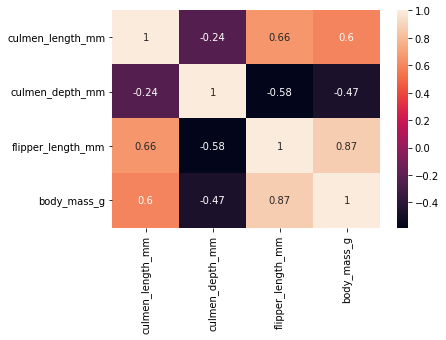

In [ ]:
import seaborn as sn

# Numeric columns of the dataset
numeric_col = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Correlation Matrix formation
corr_matrix = data.loc[:,numeric_col].corr()
print(corr_matrix)

#Using heatmap to visualize the correlation matrix
sn.heatmap(corr_matrix, annot=True)

# Задание 4 (2 балла)

1. О пингвинах какого вида в таблице больше всего недостающих данных? (Строк с `NaN`)
2. Какой информации о пингвинах чаще всего не хватает?

In [ ]:
df = data[data.isnull().any(1)]

if (df.species[data.species == "Adelie"].count() > df.species[data.species == "Gentoo"].count()): print("Adelie")
else: print("Gentoo")
data.isnull().sum(axis=0)

Adelie


species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

# Задание 5 (2 балла)

1. По данным из таблицы узнайте, равномерно ли демографиески (процент мужских и женских особей) пингвины распределены по каждому из островов. Считаем, что равномерно, если разница составляет не более 3%.
2. Результат покажите на столбиковой диаграмме.

Процент соотношения мужских и женских особей на островах.


,male,female
Torgersen,0.442308,0.461538
Biscoe,0.494048,0.476190
Dream,0.500000,0.491935



Разница в значениях не превышает 0.03. Значит пингвины распределены равномерно.



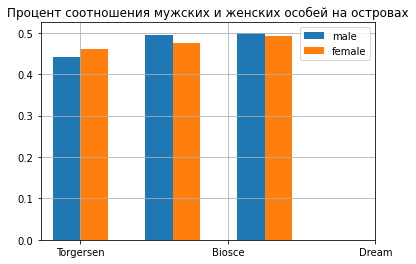

In [ ]:
import matplotlib.pyplot as plt

TF = data[data.island == "Torgersen"].sex[data.sex == "FEMALE"].count() / data.species[data.island == "Torgersen"].count()
TM = data[data.island == "Torgersen"].sex[data.sex == "MALE"].count() / data.species[data.island == "Torgersen"].count()
BF = data[data.island == "Biscoe"].sex[data.sex == "FEMALE"].count() / data.species[data.island == "Biscoe"].count()
BM = data[data.island == "Biscoe"].sex[data.sex == "MALE"].count() / data.species[data.island == "Biscoe"].count()
DF =data[data.island == "Dream"].sex[data.sex == "FEMALE"].count() / data.species[data.island == "Dream"].count()
DM = data[data.island == "Dream"].sex[data.sex == "MALE"].count() / data.species[data.island == "Dream"].count()

print("Процент соотношения мужских и женских особей на островах.")
df1 = pd.DataFrame([[TM, TF],[BM, BF],[DM, DF]],
                  columns=['male', 'female'], index =['Torgersen', 'Biscoe', 'Dream'])
display(df1)
print("\nРазница в значениях не превышает 0.03. Значит пингвины распределены равномерно.\n")

cat_par = ['Torgersen', 'Biosce', 'Dream']

g1 = [TM, BM, DM] 
g2 = [TF, BF, DF]

width = 0.3

x = np.arange(len(cat_par))

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, g1, width, label='male')
rects2 = ax.bar(x + width/2, g2, width, label='female')

ax.set_title('Процент соотношения мужских и женских особей на островах')
ax.set_xticks(x*1.6)
ax.grid(True)
ax.set_xticklabels(cat_par)
ax.legend()

In [ ]:
print("\nРазница в значениях не превышает 0.03. Значит пингвины распределены равномерно.")

# Задание 6 (2 балла)

1. Считая, что длина ласт пингвина составляет треть его роста, рассчитайте индекс массы тела каждого пингвина. Определите самый крупный вид.
2. В каком количестве популяция этого вида представлена на каждом из островов? Результат покажите на круговой диаграмме.

In [ ]:
data[data.flipper_length_mm	 == data.flipper_length_mm.max()]
data[data.body_mass_g	 == data.body_mass_g.max()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
237,Gentoo,Biscoe,49.2,15.2,221.0,6300.0,MALE


In [ ]:
data[data.flipper_length_mm	 == data.flipper_length_mm.mean()]
data[data.body_mass_g	 == data.body_mass_g.mean()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [ ]:
height = data.flipper_length_mm.max()*3
bmi = data.body_mass_g.max()/height**2
bmi

0.013118194936376755

([<matplotlib.patches.Wedge at 0x7ff0ed21b390>,
 [Text(1.1, 0.0, 'Torgersen'),
  Text(-1.1, 1.3471114790620887e-16, 'Biscoe'),
  Text(1.1, -2.6942229581241775e-16, 'Dream')])

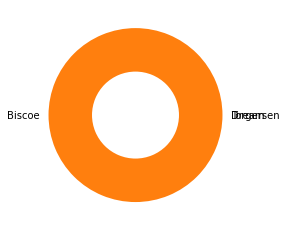

In [ ]:
T = data[data.island == "Torgersen"].species[data.species == "Gentoo"].count()
B = data[data.island == "Biscoe"].species[data.species == "Gentoo"].count()
A = data[data.island == "Dream"].species[data.species == "Gentoo"].count()

vals = [T, B, A]
labels = ["Torgersen","Biscoe", "Dream"]
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, wedgeprops=dict(width=0.5))